In [1]:
import pandas as pd

In [2]:
# load pre-processed dataset
df = pd.read_csv('../../datasets/pre_processed_dataset.csv')
df.sample(3)

,quantity_sold_kg,unit_selling_price_rmb/kg,item_name_7 colour pepper,item_name_agaricus bisporus,item_name_aihao,item_name_amaranth,item_name_apricot bao mushroom,item_name_basil,item_name_bell pepper,item_name_big broccoli,...,item_name_yuxingcao,item_name_zhijiang red bolt,item_name_zhimaxiancai,item_name_zhuyecai,category_name_aquatic,category_name_cabbage,category_name_capsicum,category_name_flower,category_name_mushroom,category_name_solanum
30,0.186250,16.000000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
10028,0.487357,8.935714,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
9503,1.000000,2.900000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [3]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
# define dependent and non dependent variables
y = df['quantity_sold_kg']
x = df.drop(columns=['quantity_sold_kg'], axis=1)

# split the dataset 0.8, 0.1, 0.1
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_eval, x_test, y_eval, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

"""use float32 data type for numerical values to reduce memory usage and improve performance"""

# convert to tensor arrays
x_train_tensor = tf.constant(x_train, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.float32)
x_eval_tensor = tf.constant(x_eval, dtype=tf.float32)
y_eval_tensor = tf.constant(y_eval, dtype=tf.float32)

x_train_tensor.shape, x_eval_tensor.shape, x_test.shape

2024-03-28 09:27:30.702929: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-03-28 09:27:30.702958: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-28 09:27:30.702974: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-28 09:27:30.703285: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-28 09:27:30.703324: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(TensorShape([10288, 155]), TensorShape([1286, 155]), (1286, 155))

In [5]:
# save testing dataset
df_test = pd.concat([y_test.reset_index(drop=True), x_test.reset_index(drop=True)], axis=1)
df_test.to_csv('../../datasets/testing_dataset.csv')
df_test.sample(3)

,quantity_sold_kg,unit_selling_price_rmb/kg,item_name_7 colour pepper,item_name_agaricus bisporus,item_name_aihao,item_name_amaranth,item_name_apricot bao mushroom,item_name_basil,item_name_bell pepper,item_name_big broccoli,...,item_name_yuxingcao,item_name_zhijiang red bolt,item_name_zhimaxiancai,item_name_zhuyecai,category_name_aquatic,category_name_cabbage,category_name_capsicum,category_name_flower,category_name_mushroom,category_name_solanum
143,0.618059,2.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
494,1.000000,13.9,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
604,0.220643,23.8,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [6]:
# convert to tensor arrays
x_test_tensor = tf.constant(x_test, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.float32)

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [8]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [9]:
from sklearn.metrics import mean_absolute_error

In [10]:
# Training set
train_pred = model.predict(x_train)
train_error = mean_absolute_error(y_train, train_pred)

# Testing set
test_pred = model.predict(x_test)
test_error = mean_absolute_error(y_test, test_pred)

print(f'Training Error: {train_error}')
print(f'Testing Error: {test_error}')

Training Error: 0.04320740355615277
Testing Error: 0.050312226172839966


In [11]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

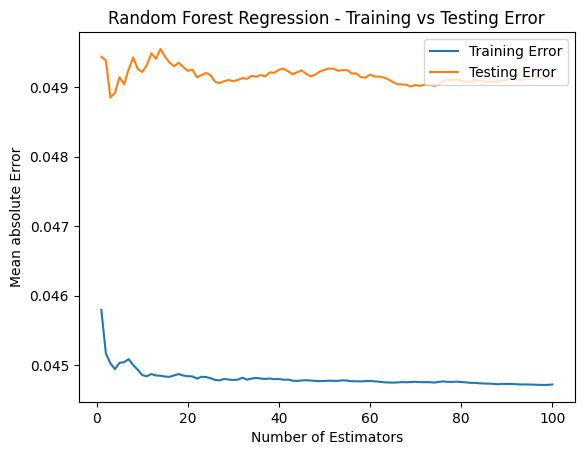

In [13]:
train_errors = []
test_errors = []

for i in range(1, 101):
    model = RandomForestRegressor(n_estimators=i, random_state=42)
    model.fit(x_train, y_train)
    
    # Training set
    train_pred = model.predict(x_train)
    train_error = mean_absolute_error(y_train, train_pred)
    train_errors.append(train_error)

    # Testing set
    test_pred = model.predict(x_test)
    test_error = mean_absolute_error(y_test, test_pred)
    test_errors.append(test_error)

# Plotting the results
plt.plot(range(1, 101), train_errors, label='Training Error')
plt.plot(range(1, 101), test_errors, label='Testing Error')
plt.title('Random Forest Regression - Training vs Testing Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean absolute Error')
plt.legend(loc='upper right')

In [17]:
# model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(x_train_tensor.shape[1], input_shape=(x_train_tensor.shape[1],)))
model.add(tf.keras.layers.Reshape((1, x_train_tensor.shape[1]))) 
model.add(tf.keras.layers.LSTM(128))
model.add(tf.keras.layers.Dense(64, activation='tanh'))
model.add(tf.keras.layers.Reshape((1, 64))) 
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(4, activation='tanh'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mae', metrics=['mae'])

epoch_number = 50

# train model and get history
history = model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_eval_tensor, y_eval_tensor))

Epoch 1/50


/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


322/322 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.3873 - mae: 0.3873 - val_loss: 0.2051 - val_mae: 0.2046
Epoch 2/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1723 - mae: 0.1723 - val_loss: 0.1066 - val_mae: 0.1050
Epoch 3/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0892 - mae: 0.0892 - val_loss: 0.0699 - val_mae: 0.0693
Epoch 4/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0668 - mae: 0.0668 - val_loss: 0.0635 - val_mae: 0.0631
Epoch 5/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0603 - mae: 0.0603 - val_loss: 0.0601 - val_mae: 0.0597
Epoch 6/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0569 - mae: 0.0569 - val_loss: 0.0589 - val_mae: 0.0589
Epoch 7/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0559 - mae: 0.0559 - val_loss: 0.0574 - val_mae: 0.0571
Epoch 8/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0540 - mae: 0.0540 - val_loss: 0.0554 - val_mae: 0.0551
Epoch 9/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss

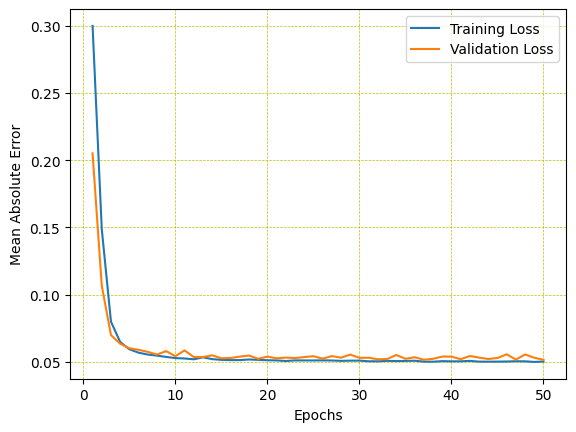

In [18]:
# plot loss with respect to epoch number
x_range = range(1, epoch_number + 1)
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(x_range, loss, label='Training Loss')
plt.plot(x_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.grid(True, linewidth = 0.5, color = 'y', linestyle = '--')

In [20]:
# final_model
final_model = tf.keras.Sequential()
final_model.add(tf.keras.layers.Dense(x_train_tensor.shape[1], input_shape=(x_train_tensor.shape[1],)))
final_model.add(tf.keras.layers.Reshape((1, x_train_tensor.shape[1]))) 
final_model.add(tf.keras.layers.LSTM(128))
final_model.add(tf.keras.layers.Dense(64, activation='tanh'))
final_model.add(tf.keras.layers.Reshape((1, 64))) 
final_model.add(tf.keras.layers.LSTM(16))
final_model.add(tf.keras.layers.Dense(4, activation='tanh'))
final_model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile model
final_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mae', metrics=['mae'])

epoch_number = 20

# train model and get history
history = final_model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_eval_tensor, y_eval_tensor))

Epoch 1/20


/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


322/322 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.3636 - mae: 0.3636 - val_loss: 0.1834 - val_mae: 0.1820
Epoch 2/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1497 - mae: 0.1497 - val_loss: 0.0928 - val_mae: 0.0917
Epoch 3/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0781 - mae: 0.0781 - val_loss: 0.0690 - val_mae: 0.0683
Epoch 4/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0654 - mae: 0.0654 - val_loss: 0.0637 - val_mae: 0.0633
Epoch 5/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0613 - mae: 0.0613 - val_loss: 0.0610 - val_mae: 0.0606
Epoch 6/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0567 - mae: 0.0567 - val_loss: 0.0610 - val_mae: 0.0606
Epoch 7/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0574 - mae: 0.0574 - val_loss: 0.0561 - val_mae: 0.0559
Epoch 8/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0555 - mae: 0.0555 - val_loss: 0.0679 - val_mae: 0.0677
Epoch 9/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss

In [21]:
final_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 155)            │        24,180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_8 (Reshape)             │ (None, 1, 155)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 128)            │       145,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_9 (Reshape)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 16)             │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 549,305 (2.10 MB)

 Trainable params: 183,101 (715.24 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 366,204 (1.40 MB)

In [22]:
# view loss for testing values
final_model.evaluate(x_test_tensor, y_test_tensor)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0490 - mae: 0.0490


[0.04778588190674782, 0.04802553728222847]

In [23]:
# predict sample value set
y_predictions = final_model.predict(x_test_tensor)
y_predictions[:5]

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([[1.001324  ],
       [0.42373878],
       [0.99893296],
       [0.5305933 ],
       [0.12990858]], dtype=float32)

In [24]:
# view actual values
y_test_tensor[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1.    , 0.4258, 1.    , 0.666 , 0.003 ], dtype=float32)>

In [25]:
from sklearn.metrics import root_mean_squared_error

In [26]:
root_mean_squared_error(y_test_tensor, y_predictions)

0.09286268

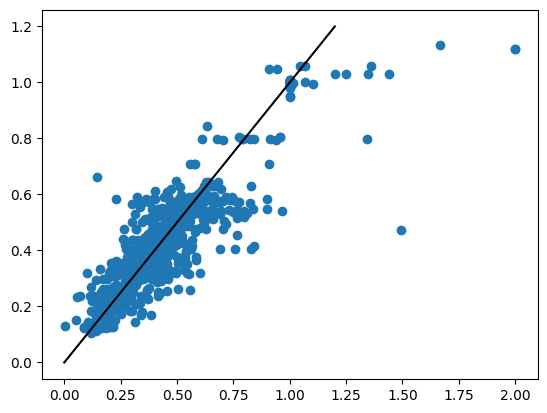

In [27]:
x = [0 , 1.2]
y = x

plt.scatter(y_test_tensor, y_predictions)
plt.plot(x, y, color='black')

In [31]:
# save final model
final_model.save('sales_prediction_model.keras')